<h2 style="display: flex; justify-content: space-between; align-items: center;">
    <span>Exercise 11a</span>
    <span>Date: 26/03/2025</span>
</h2>

<h2 style="text-align:center;">Single Layer Perceptron - Linearly Separable Dataset</h2>

### <ins>**Aim:**</ins> To build a Single Layer Perceptron on a linearly separable dataset.

### <ins>**Algorithm:**</ins>

The Single-Layer Perceptron (SLP) is a fundamental neural network model used for binary classification.  
It consists of a single neuron with an activation function that determines the output.  
The perceptron updates its weights iteratively based on misclassified points until convergence, making it suitable for linearly separable data.

The learning process is formulated as:

$$ w \leftarrow w + \eta (y_i - \hat{y}_i) x_i $$

Where:
- $w$ represents the weight vector,
- $x_i$ is the input feature vector,
- $y_i$ is the actual class label (0 or 1),
- $\hat{y}_i$ is the predicted output,
- $\eta$ is the learning rate.

The perceptron uses a step activation function, which outputs 1 if the weighted sum is non-negative and 0 otherwise. This makes it suitable for linearly separable data.

Step 1: Import Libraries
- Import necessary Python libraries including NumPy for numerical operations, Matplotlib for visualization, and scikit-learn modules for data preprocessing and splitting.

Step 2: Load the Dataset
- Generate a synthetic dataset containing 200 random feature values with 2 dimensions.
- Assign binary class labels based on the sum of feature values using a threshold.

Step 3: Split the Data
- Divide the dataset into training (80%) and testing (20%) sets using `train_test_split()`.

Step 4: Preprocess the Data
- Standardize the feature values using `StandardScaler()` to improve model performance.

Step 5: Define the Single Layer Perceptron
- Create a class `SingleLayerPerceptron` that initializes random weights.
- Implement a step activation function that outputs 1 if the weighted sum is non-negative, otherwise 0.
- Implement a `train()` method that updates weights based on prediction errors using a simple perceptron learning rule.

Step 6: Train the Model
- Initialize the perceptron with 2 input features.
- Train the perceptron on the dataset using the training samples.

Step 7: Evaluate the Model
- Use the trained model to make predictions on the dataset.
- Compute the accuracy by comparing predicted labels with actual labels.

Step 8: Visualize the Results
- Define a function to scatter plot the data points with class labels.
- Overlay the decision boundary using model predictions on a grid.
- Display the scatter plot to observe how well the perceptron classifies the data.

### Import the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the dataset

In [13]:
np.random.seed(42)
X_linear = np.random.randn(200, 2)
y_linear = (X_linear[:, 0] + X_linear[:, 1] > 0).astype(int)

### Split the Data

In [14]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

### Preprocess the data

In [15]:
scaler = StandardScaler()
X_train_lin = scaler.fit_transform(X_train_lin)
X_test_lin = scaler.transform(X_test_lin)

### Single Layer Perceptron

In [ ]:
class SingleLayerPerceptron:
    def __init__(self, input_dim, learning_rate=0.01, epochs=1000):
        self.weights = np.random.randn(input_dim + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function
    
    def predict(self, X):
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return np.array([self.activation(np.dot(self.weights, x)) for x in X_bias])
    
    def train(self, X, y):
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = self.activation(np.dot(self.weights, X_bias[i]))
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X_bias[i]

### Training the model

In [17]:
perceptron_linear = SingleLayerPerceptron(input_dim=2)
perceptron_linear.train(X_linear, y_linear)

### Evaluating the model

In [18]:
y_pred_lin = perceptron_linear.predict(X_linear)
acc_lin = np.mean(y_pred_lin == y_linear)
print(f"Accuracy on Linearly Separable Data: {acc_lin:.4f}")

Accuracy on Linearly Separable Data: 1.0000


### Visualisation

In [19]:
def plot_data_og(X, y, title, model=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    if model is not None:
        xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, levels=[0.5], colors='black')
    
    plt.show()

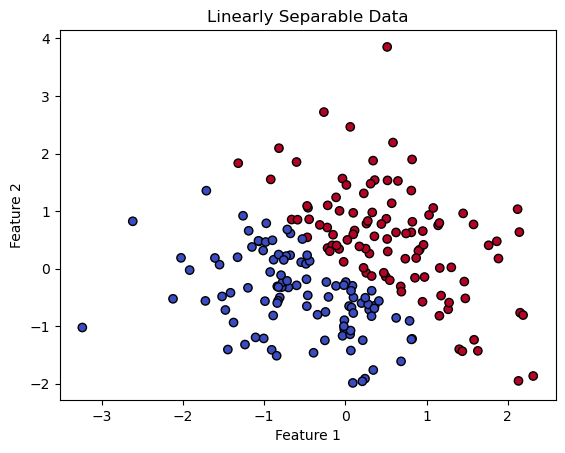

In [20]:
plot_data_og(X_linear, y_linear, "Linearly Separable Data")

In [21]:
def plot_data(X, y, title, model, nonlinear=False):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
    
    if nonlinear:
        X_grid = np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2]
    else:
        X_grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(X_grid) 
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black')

    plt.show()

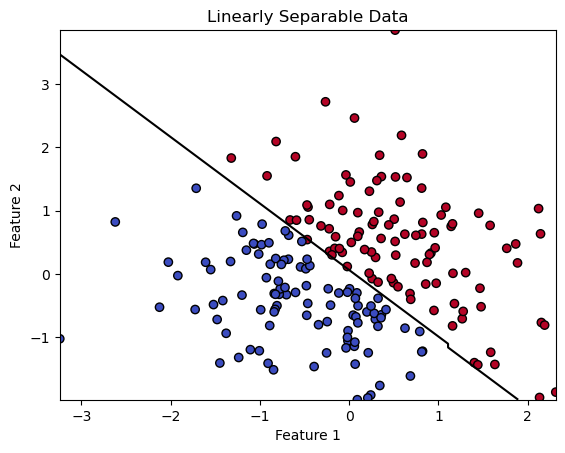

In [22]:
plot_data(X_linear, y_linear, "Linearly Separable Data", perceptron_linear)

### Result

A Single-Layer Perceptron (SLP) model was successfully implemented for classifying a linearly separable dataset.

---